# Quick Guide to Facebook's Prophet Basics
---
---


Link to Prophet paper: https://peerj.com/preprints/3190.pdf
---
---

## IMPORTANT NOTE TWO:

-----
------

* **NOTE: Link to installation instructions:** 
    * https://facebook.github.io/prophet/docs/installation.html#python 
    * SCROLL DOWN UNTIL YOU SEE THE ANACONDA OPTION AT THE BOTTOM OF THE PAGE.
    * YOU MAY NEED TO INSTALL BOTH **conda install gcc** and **conda install -c conda-forge fbprophet**
    * PLEASE READ THROUGH THE DOCS AND STACKOERFLOW CAREFULLY BEFORE POSTING INSTALLATION ISSUES TO THE QA FORUMS.

-----
----

## Load Libraries

In [57]:
import pandas as pd
from fbprophet import Prophet

## Load Data

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [58]:
df = pd.read_csv('../Data/BeerWineLiquor.csv')

In [59]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


## Format the Data

### Facebook prophet wants the datetime column to be called `ds` and the time-series (predicting series)  `y`

In [60]:
df.columns = ['ds','y']

In [61]:
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
ds    324 non-null datetime64[ns]
y     324 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [63]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Here Prophet didn't find any weekly/monthly seasonality. In case I know for sure my data has seasonality from EDA we can override that mby going to prophet parameters

## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [65]:
# MS: Month start
future = m.make_future_dataframe(periods=24,freq = 'MS') 

If we set up periods as 24 and frequency as monthly start, it means we are looking to predict 2 years in future.

In [66]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [67]:
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [68]:
# future data is NOT predicted yet
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


We are looking for making a dataset i.e. `future` here, which contains the df data plus the future dates we are trying to predict.

In [69]:
len(df)

324

In [70]:
len(df),len(future)

(324, 348)

So difference is 24 because of the forecasting period


### Step 2: Predict and fill in the Future

In [71]:
forecast = m.predict(future)

In [72]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1773.449803,1155.125157,1479.301114,1773.449803,1773.449803,-461.776706,-461.776706,-461.776706,-461.776706,-461.776706,-461.776706,0.0,0.0,0.0,1311.673097
1,1992-02-01,1776.239771,1191.988671,1504.792842,1776.239771,1776.239771,-427.591035,-427.591035,-427.591035,-427.591035,-427.591035,-427.591035,0.0,0.0,0.0,1348.648735
2,1992-03-01,1778.849740,1440.069609,1757.696176,1778.849740,1778.849740,-179.181320,-179.181320,-179.181320,-179.181320,-179.181320,-179.181320,0.0,0.0,0.0,1599.668420
3,1992-04-01,1781.639707,1423.213644,1748.634651,1781.639707,1781.639707,-196.311603,-196.311603,-196.311603,-196.311603,-196.311603,-196.311603,0.0,0.0,0.0,1585.328104
4,1992-05-01,1784.339676,1663.137147,1990.483532,1784.339676,1784.339676,45.026915,45.026915,45.026915,45.026915,45.026915,45.026915,0.0,0.0,0.0,1829.366590


In [73]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5201.010945,5080.052233,5404.880628,5188.470558,5212.881078,40.218725,40.218725,40.218725,40.218725,40.218725,40.218725,0.0,0.0,0.0,5241.229670
344,2020-09-01,5217.085200,4926.315914,5248.718739,5204.381358,5229.843712,-132.884136,-132.884136,-132.884136,-132.884136,-132.884136,-132.884136,0.0,0.0,0.0,5084.201064
345,2020-10-01,5232.640931,5022.038347,5358.804198,5218.466012,5246.454811,-43.275393,-43.275393,-43.275393,-43.275393,-43.275393,-43.275393,0.0,0.0,0.0,5189.365538
346,2020-11-01,5248.715186,5168.257803,5495.900720,5233.064795,5263.249804,86.703091,86.703091,86.703091,86.703091,86.703091,86.703091,0.0,0.0,0.0,5335.418277
347,2020-12-01,5264.270916,6176.126019,6487.089579,5247.509818,5280.295466,1071.508751,1071.508751,1071.508751,1071.508751,1071.508751,1071.508751,0.0,0.0,0.0,6335.779667


In [74]:
# PROPHET produces several columns
# We only need a few columns
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [75]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4628.788552,4470.685473,4794.499731
337,2020-02-01,4679.048478,4518.404321,4840.940429
338,2020-03-01,4942.495400,4776.896419,5105.353883
339,2020-04-01,4941.439371,4778.452100,5106.740739
340,2020-05-01,5198.333619,5025.858032,5353.841289
341,2020-06-01,5179.412285,5016.018299,5337.133174
342,2020-07-01,5311.959526,5151.484220,5474.729123
343,2020-08-01,5241.229670,5080.052233,5404.880628
344,2020-09-01,5084.201064,4926.315914,5248.718739
345,2020-10-01,5189.365538,5022.038347,5358.804198


### Plotting Forecast

We can use Prophet's own built in plotting tools

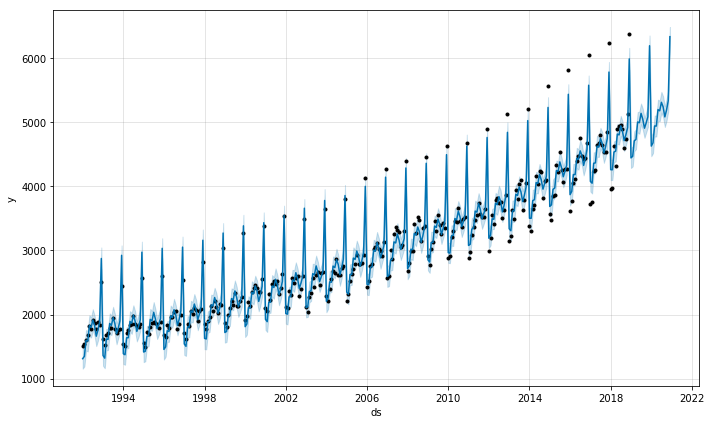

In [76]:
# m is prophet object
m.plot(forecast);

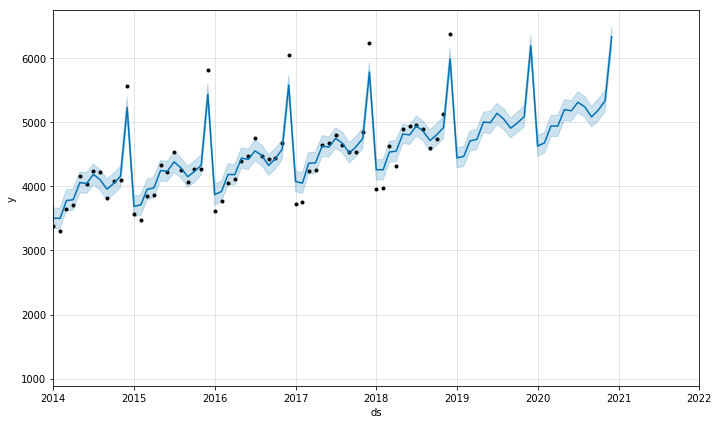

In [77]:
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01');

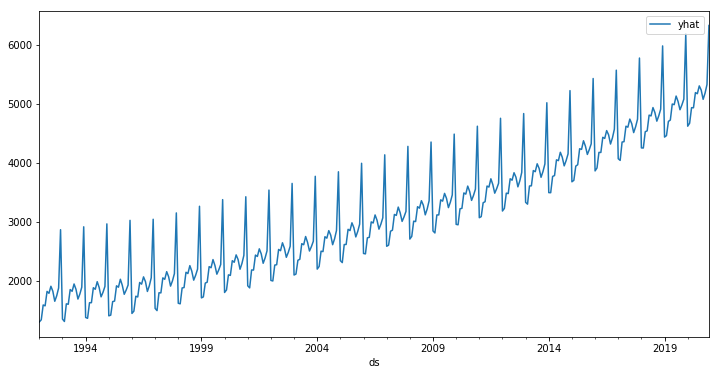

In [78]:
# NOT using prophet built in plot capabilities
forecast.plot(x='ds',y='yhat', figsize=(12,6))

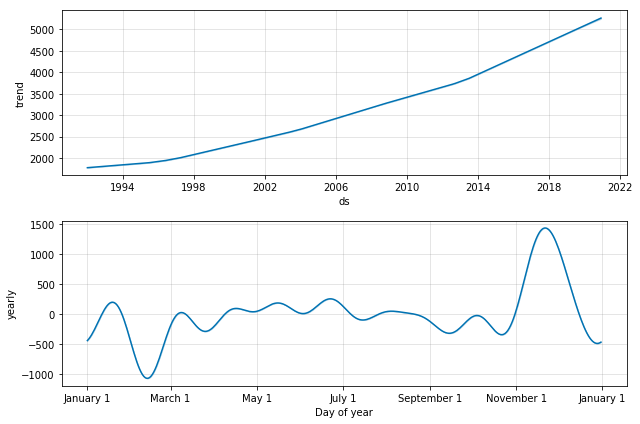

In [79]:
m.plot_components(forecast);